# *Draw or import AOI in Planet Basemap viewer: copy all tile ID's, paste in quad_ids list variable in format.*

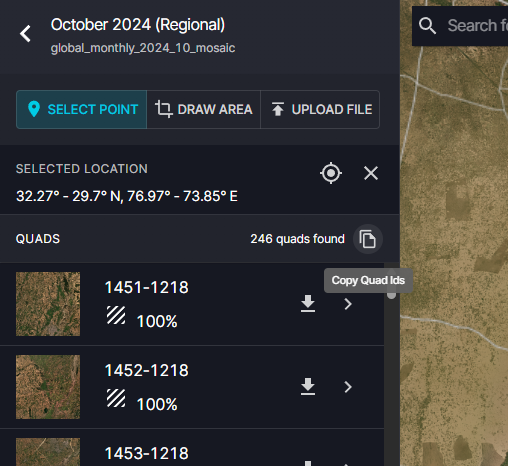

.

In [1]:
import requests
import os
import json

## Monthly

In [ ]:
# Your Planet API key
API_KEY = 'api key'  # Replace with your actual API key

# Authentication tuple
auth = (API_KEY, '')

# Directory to save downloaded tiles
download_dir = 'planet_basemaps_october_2024'      # Change to reflect the new month/year
os.makedirs(download_dir, exist_ok=True)

# List of basemap IDs (quad IDs)
quad_ids = [
    '1451-1218', '1452-1218'
]

# Step 1: Find the series ID for 'Global Monthly'
series_url = 'https://api.planet.com/basemaps/v1/series'
response = requests.get(series_url, auth=auth)
if response.status_code != 200:
    print(f"Error fetching series: {response.text}")
    exit(1)
series_data = response.json()['series']
series_id = None
for s in series_data:
    if s['name'] == 'Global Monthly':
        series_id = s['id']
        break
if not series_id:
    print("Global Monthly series not found.")
    exit(1)

# Step 2: Find the mosaic for October 2024
mosaics_url = f'https://api.planet.com/basemaps/v1/series/{series_id}/mosaics'
response = requests.get(mosaics_url, auth=auth)
if response.status_code != 200:
    print(f"Error fetching mosaics: {response.text}")
    exit(1)
mosaics = response.json()['mosaics']
mosaic_id = None
for m in mosaics:
    # Check if the mosaic covers October 2024          (change here based of month requirement)
    if '2024-10' in m['first_acquired']:   # Update to the target month in YYYY-MM format
        mosaic_id = m['id']
        mosaic_name = m['name']  # For reference
        print(f"Found mosaic: {mosaic_name}")
        break
if not mosaic_id:
    print("No mosaic found for October 2024.")
    exit(1)

# Step 3: Download each quad
for quad_id in quad_ids:
    quad_url = f'https://api.planet.com/basemaps/v1/mosaics/{mosaic_id}/quads/{quad_id}'
    response = requests.get(quad_url, auth=auth)
    if response.status_code != 200:
        print(f"Error fetching quad {quad_id}: {response.text}")
        continue
    quad_data = response.json()
    download_url = quad_data['_links']['download']

    # Download the file
    file_path = os.path.join(download_dir, f"{quad_id}.tif")
    with requests.get(download_url, stream=True) as r:
        if r.status_code == 200:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Downloaded {quad_id} to {file_path}")
        else:
            print(f"Error downloading {quad_id}: {r.text}")

Found mosaic: global_monthly_2024_10_mosaic
Downloaded 1451-1218 to planet_basemaps_october_2024/1451-1218.tif
Downloaded 1452-1218 to planet_basemaps_october_2024/1452-1218.tif


## Quarterly

In [ ]:
# Your Planet API key
API_KEY = 'key'  # Replace with your actual API key

# Authentication tuple
auth = (API_KEY, '')

# Directory to save downloaded tiles
download_dir = 'Gorakhpur_q4_2024'  # Change to reflect the new quarter/year
os.makedirs(download_dir, exist_ok=True)

# List of basemap IDs (quad IDs)
quad_ids = [
    '1495-1184', '1496-1184'
]

# Step 1: Find the series ID for 'Global Quarterly'
series_url = 'https://api.planet.com/basemaps/v1/series'
response = requests.get(series_url, auth=auth)
if response.status_code != 200:
    print(f"Error fetching series: {response.text}")
    exit(1)
series_data = response.json()['series']
series_id = None
for s in series_data:
    if s['name'] == 'Global Quarterly':
        series_id = s['id']
        break
if not series_id:
    print("Global Quarterly series not found.")
    exit(1)

# Step 2: Find the mosaic for Q4 2024 (October-December)
mosaics_url = f'https://api.planet.com/basemaps/v1/series/{series_id}/mosaics'
response = requests.get(mosaics_url, auth=auth)
if response.status_code != 200:
    print(f"Error fetching mosaics: {response.text}")
    exit(1)
mosaics = response.json()['mosaics']
mosaic_id = None
for m in mosaics:
    # Check if the mosaic covers Q4 2024 (look for '2024-10' in first_acquired)
    if '2024-10' in m['first_acquired']:  # Update to the starting month of the target quarter in YYYY-MM format
        mosaic_id = m['id']
        mosaic_name = m['name']  # For reference
        print(f"Found mosaic: {mosaic_name}")
        break
if not mosaic_id:
    print("No mosaic found for Q4 2024.")
    exit(1)

# Step 3: Download each quad
for quad_id in quad_ids:
    quad_url = f'https://api.planet.com/basemaps/v1/mosaics/{mosaic_id}/quads/{quad_id}'
    response = requests.get(quad_url, auth=auth)
    if response.status_code != 200:
        print(f"Error fetching quad {quad_id}: {response.text}")
        continue
    quad_data = response.json()
    download_url = quad_data['_links']['download']

    # Download the file
    file_path = os.path.join(download_dir, f"{quad_id}.tif")
    with requests.get(download_url, stream=True) as r:
        if r.status_code == 200:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Downloaded {quad_id} to {file_path}")
        else:
            print(f"Error downloading {quad_id}: {r.text}")